In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
import os
import cv2

In [ ]:
path = '/content/drive/MyDrive/EyePACS/Messidor-2+EyePac_Balanced'
data_dir_list = os.listdir(path)
data_dir_list

['0', '4', '1', '3', '2']

In [ ]:
img_rows=224
img_cols=224
num_channel=3
img_data_list=[]
classes_names_list=[]
target_column=[]

In [ ]:
for dataset in data_dir_list:
    classes_names_list.append(dataset)
    print("Getting image from {} folder".format(dataset))
    img_list= os.listdir(path +"/"+ dataset)
    for img in img_list:
        input_img = cv2.imread(path +"/"+dataset+"/"+img)
        input_img_resize=cv2.resize(input_img,(img_rows,img_cols))
        img_data_list.append(input_img_resize)
        target_column.append(dataset)

Getting image from 0 folder
Getting image from 4 folder
Getting image from 1 folder
Getting image from 3 folder
Getting image from 2 folder


In [ ]:
num_classes = len(classes_names_list)
print("num_classes",num_classes)
img_data = np.array(img_data_list) 
img_data = img_data.astype('float32')
img_data /= 255
print("Shape of image data",img_data.shape)
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape 
print("number of samples",num_of_samples)
print("target column before encoding",target_column)

num_classes 5
Shape of image data (1800, 224, 224, 3)
number of samples 1800
target column before encoding ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [ ]:
from sklearn.preprocessing import LabelEncoder
Labelencoder = LabelEncoder()
target_column = Labelencoder.fit_transform(target_column)
np.unique(target_column)

array([0, 1, 2, 3, 4])

In [ ]:
target_column

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
from keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
target_column_hotcoded = to_categorical(target_column,num_classes)
X,Y = shuffle(img_data,target_column_hotcoded,random_state=2)
X_train,X_temp,y_train,y_temp = train_test_split(X,Y,test_size=0.3,random_state=2)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp,test_size=0.3,random_state=2)

In [ ]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Dense,Dropout,Flatten
from keras.models import Sequential
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 220, 220, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 774400)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               99123328  
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [ ]:
num_epoch = 20
batch_size = 32

In [ ]:
from keras.applications.vgg16 import preprocess_input
datagen = ImageDataGenerator(validation_split=0.2, preprocessing_function = preprocess_input)
train_generator = datagen.flow_from_directory(
path,
subset='training',
target_size=[224,224],
classes = ['0','4','1','3','2'],
class_mode = 'categorical')
valid_generator = datagen.flow_from_directory(
path, 
subset='validation',
target_size=[224,224],
classes = ['0','4','1','3','2'],
class_mode = 'categorical')

In [ ]:
history = model.fit(X_train,y_train,batch_size=batch_size,epochs=num_epoch,verbose=1,validation_data=(X_test,y_test))

Epoch 1/20
40/40 [==============================] - 467s 12s/step - loss: 16.0694 - accuracy: 0.3362 - val_loss: 1.0928 - val_accuracy: 0.4683
Epoch 2/20
40/40 [==============================] - 454s 11s/step - loss: 1.1395 - accuracy: 0.4592 - val_loss: 1.1248 - val_accuracy: 0.4471
Epoch 3/20
40/40 [==============================] - 455s 11s/step - loss: 1.1334 - accuracy: 0.4542 - val_loss: 1.0326 - val_accuracy: 0.5185
Epoch 4/20
40/40 [==============================] - 452s 11s/step - loss: 1.0612 - accuracy: 0.4861 - val_loss: 1.0548 - val_accuracy: 0.4947
Epoch 5/20
40/40 [==============================] - 459s 11s/step - loss: 1.0147 - accuracy: 0.5168 - val_loss: 1.0189 - val_accuracy: 0.5317
Epoch 6/20
40/40 [==============================] - 451s 11s/step - loss: 0.8398 - accuracy: 0.6544 - val_loss: 1.0481 - val_accuracy: 0.5291
Epoch 7/20
40/40 [==============================] - 453s 11s/step - loss: 0.5372 - accuracy: 0.8118 - val_loss: 1.0916 - val_accuracy: 0.5529
Epoch

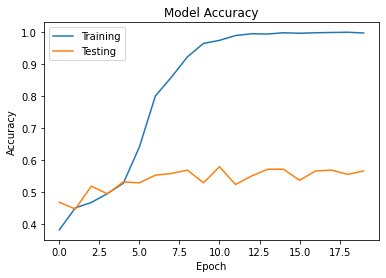

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'])
plt.show()

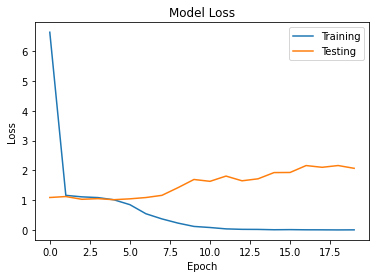

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'])
plt.show()

In [ ]:
y_pred = model.predict(X_test, batch_size=batch_size)

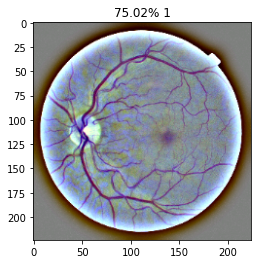

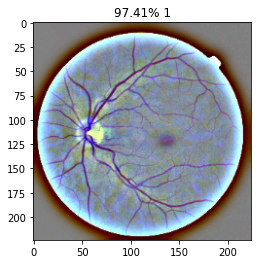

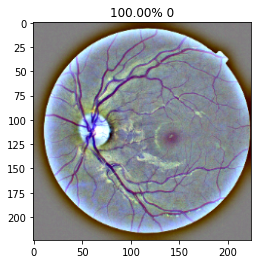

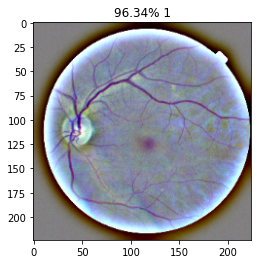

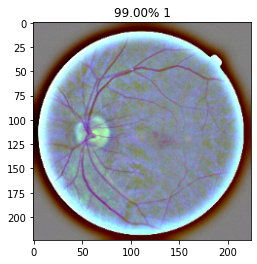

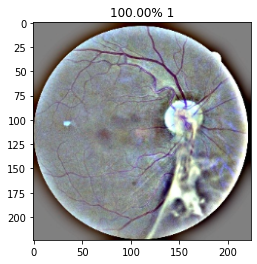

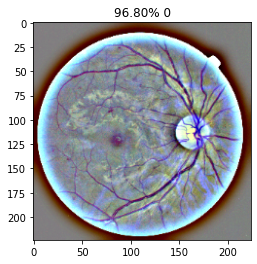

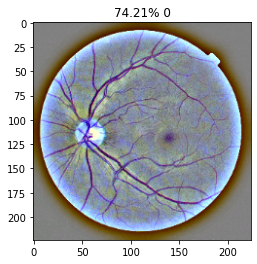

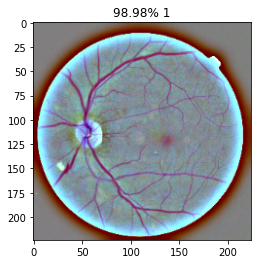

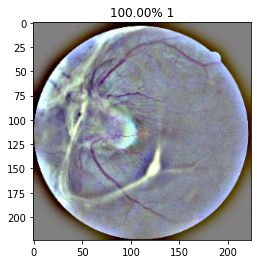

In [ ]:
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% 0')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% 1')
  plt.imshow(X_test[index])
  plt.show()

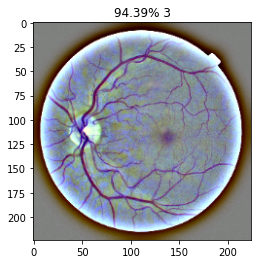

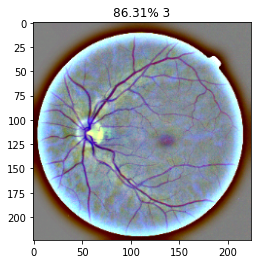

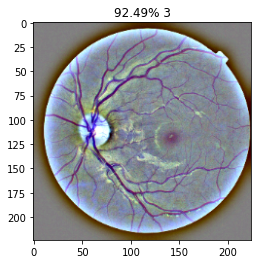

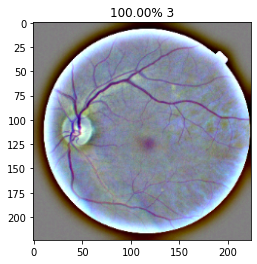

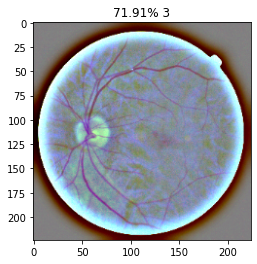

In [ ]:
prediction=y_pred[11:16]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% 2')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% 3')
  plt.imshow(X_test[index])
  plt.show()

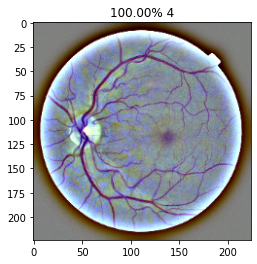

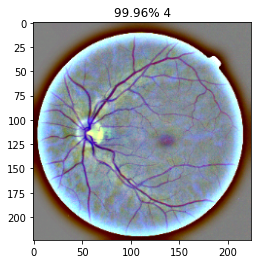

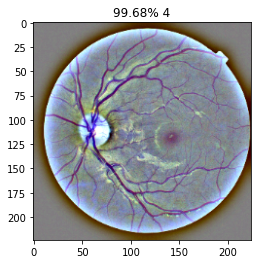

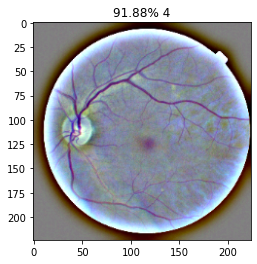

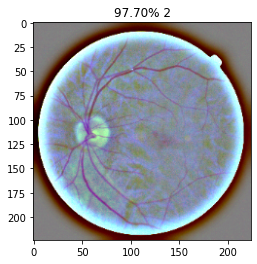

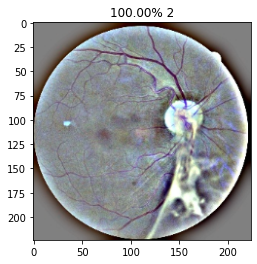

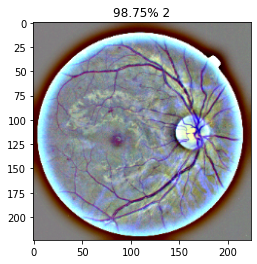

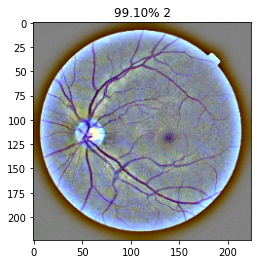

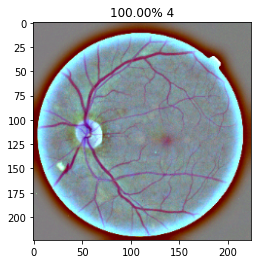

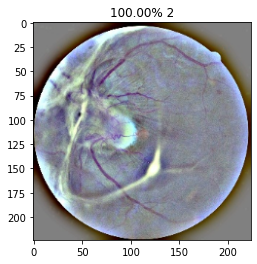

In [ ]:
prediction=y_pred[16:26]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% 2')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% 4')
  plt.imshow(X_test[index])
  plt.show()

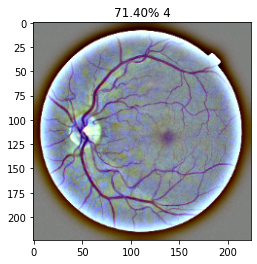

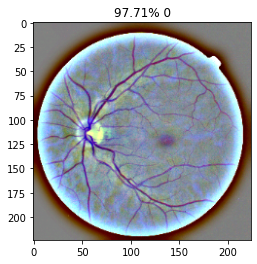

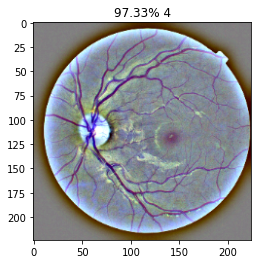

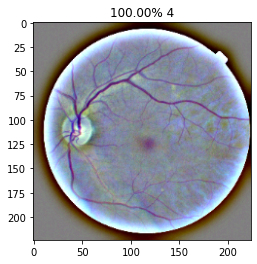

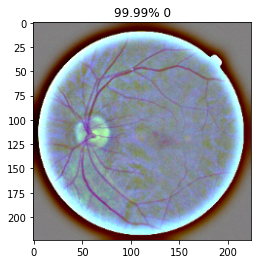

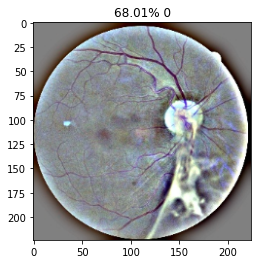

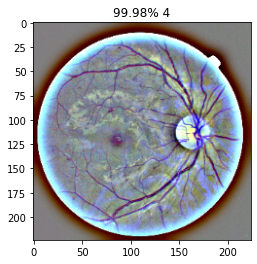

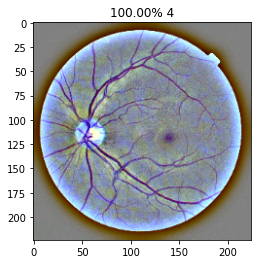

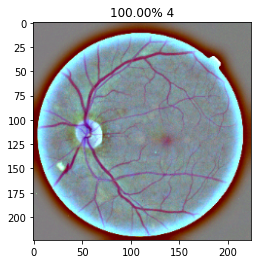

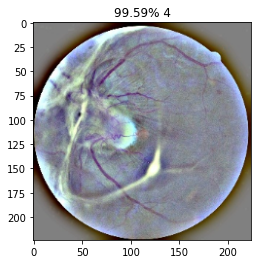

In [ ]:
prediction=y_pred[26:36]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% 0')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% 4')
  plt.imshow(X_test[index])
  plt.show()

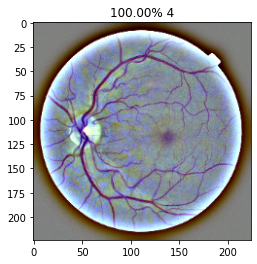

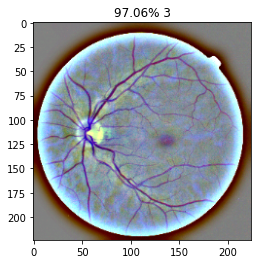

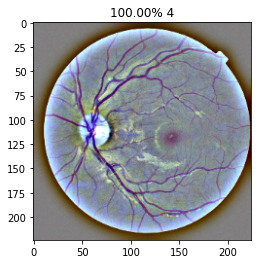

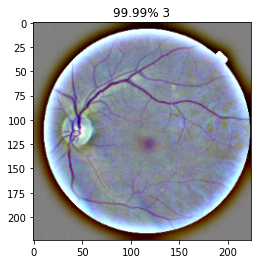

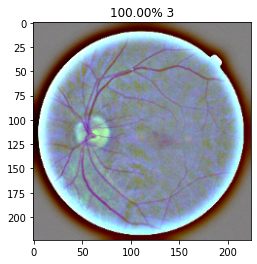

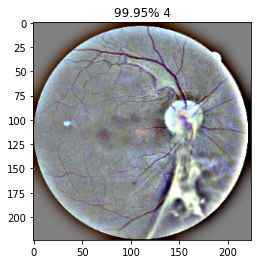

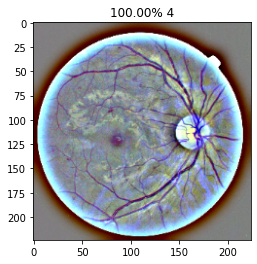

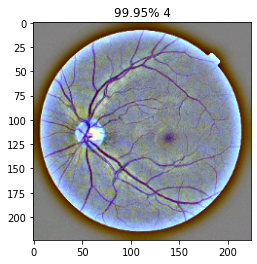

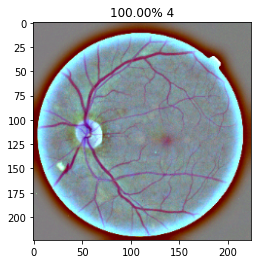

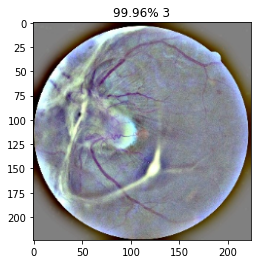

In [ ]:
prediction=y_pred[36:46]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% 3')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% 4')
  plt.imshow(X_test[index])
  plt.show()

In [ ]:
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(normalize):
  classes = ['0','1','2','3','4']
  tick_marks = [0.5,1.5,2.5,3.5,4.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion Matrix without Normalization


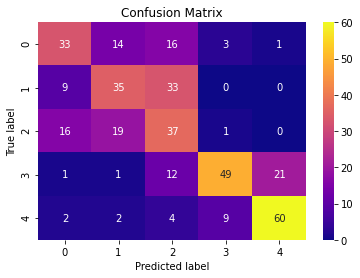

In [ ]:
import seaborn as sns
print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

Confusion Matrix with Normalized Values


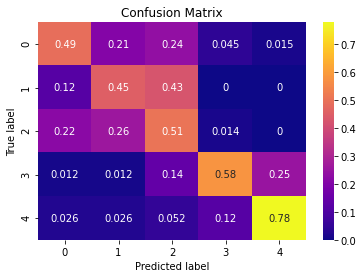

In [ ]:
print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.54      0.49      0.52        67
           1       0.49      0.45      0.47        77
           2       0.36      0.51      0.42        73
           3       0.79      0.58      0.67        84
           4       0.73      0.78      0.75        77

    accuracy                           0.57       378
   macro avg       0.58      0.56      0.57       378
weighted avg       0.59      0.57      0.57       378

